<a href="https://colab.research.google.com/github/gautam-pai/PyTorch-Learning/blob/main/Multiple_Layer_to_Single_Layer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F

In [2]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
%matplotlib inline

## Read image

In [3]:
image_path='basketball.jpg'
image_tensor=read_image(image_path)

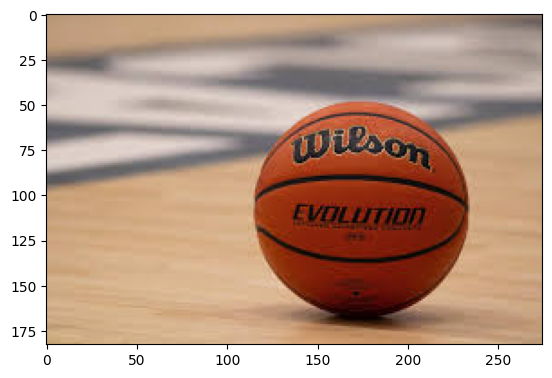

In [4]:
plt.imshow(image_tensor.permute(1,2,0))

In [5]:
image_tensor.shape

torch.Size([3, 183, 275])

In [6]:
image_shape=torch.empty(image_tensor.shape)

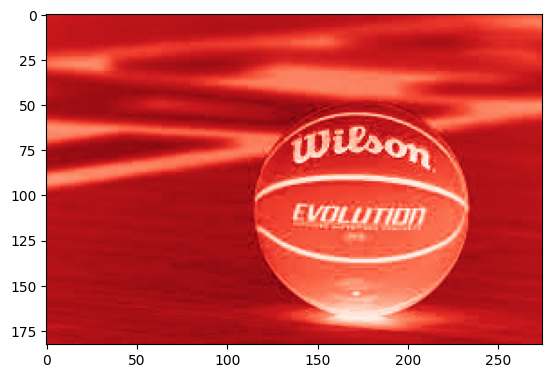

In [7]:
red_layer=image_tensor[0]
plt.imshow(red_layer.reshape(183, 275),cmap="Reds")

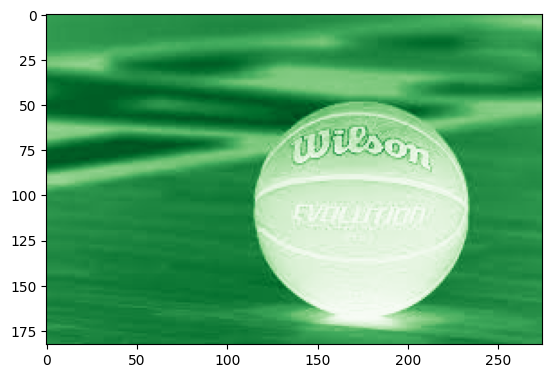

In [8]:
green_layer=image_tensor[1]
plt.imshow(green_layer.reshape(183, 275),cmap="Greens")

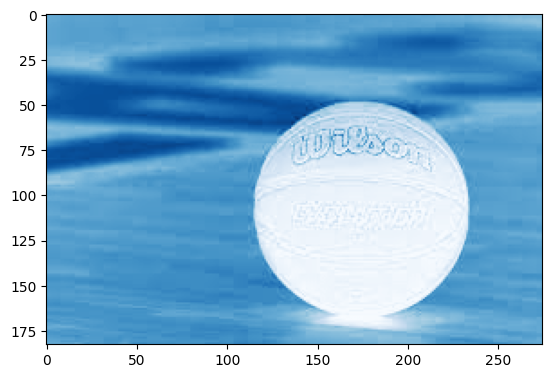

In [9]:
blue_layer=image_tensor[2]
plt.imshow(blue_layer.reshape(183, 275),cmap="Blues")

## Edge Detection in different layers

### Define Convolution Function

In [24]:
class convolve(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1,padding=1)
    self.conv3=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1,padding=1)
    self.conv4=nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,stride=1,padding=1)
  def forward(self,X):
    X=self.conv1(X)
    X=self.conv2(X)
    X=self.conv3(X)
    X=self.conv4(X)
    return X


In [11]:
One_Layer_Model=convolve()

In [12]:
One_Layer_Model

convolve(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [13]:
Red_Edge=One_Layer_Model(red_layer.unsqueeze(0).float())
Red_Edge = Red_Edge.detach().cpu()
Red_Edge_Normalized=(Red_Edge - Red_Edge.min()) / (Red_Edge.max() - Red_Edge.min())

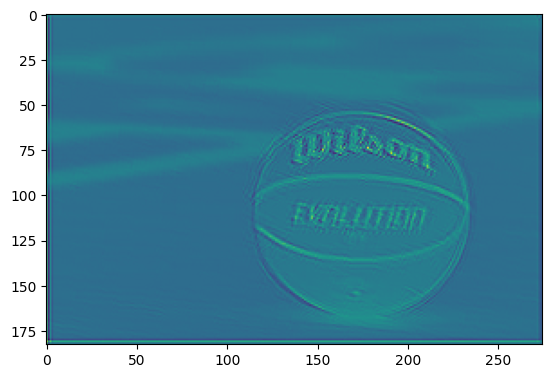

In [14]:
plt.imshow(Red_Edge_Normalized.reshape(183,275))

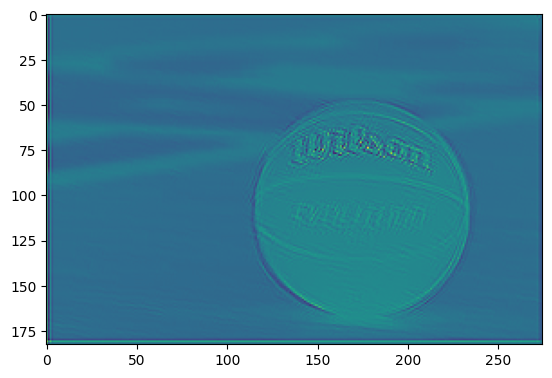

In [15]:
Green_Edge=One_Layer_Model(green_layer.unsqueeze(0).float())
Green_Edge = Green_Edge.detach().cpu()
Green_Edge_Normalized=(Green_Edge - Green_Edge.min()) / (Green_Edge.max() - Green_Edge.min())
plt.imshow(Green_Edge_Normalized.reshape(183,275))

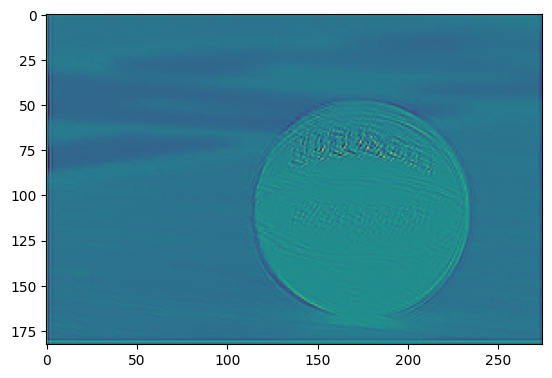

In [16]:
Blue_Edge=One_Layer_Model(blue_layer.unsqueeze(0).float())
Blue_Edge = Blue_Edge.detach().cpu()
Blue_Edge_Normalized=(Blue_Edge - Blue_Edge.min()) / (Blue_Edge.max() - Blue_Edge.min())
plt.imshow(Blue_Edge_Normalized.reshape(183,275))

In [17]:
Green_Edge.shape

torch.Size([1, 183, 275])

In [18]:
Green_Edge_Normalized.squeeze(0).shape

torch.Size([183, 275])

In [19]:
image_shape[0],image_shape[1],image_shape[2]=Red_Edge_Normalized.squeeze(0),Green_Edge_Normalized.squeeze(0),Blue_Edge_Normalized.squeeze(0)

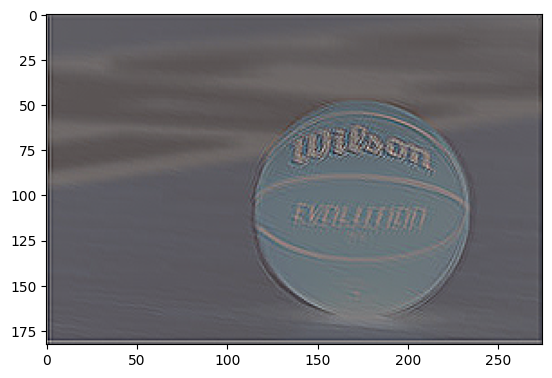

In [20]:
plt.imshow(image_shape.permute(1,2,0))

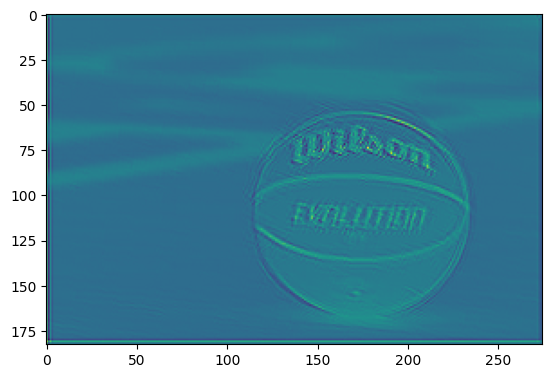

In [21]:

plt.imshow(image_shape.permute(1,2,0))
plt.imshow(Red_Edge_Normalized.permute(1,2,0))

Text(0.5, 1.0, 'Blue Layer Image')

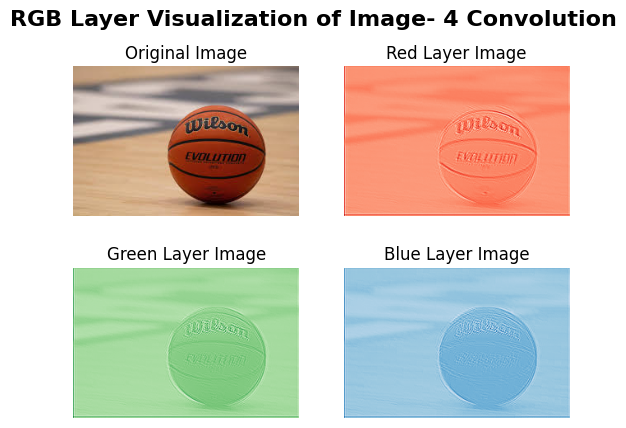

In [22]:
plt.suptitle("RGB Layer Visualization of Image- 4 Convolution", fontsize=16, fontweight="bold")

plt.subplot(2, 2, 1)
plt.imshow(image_tensor.permute(1,2,0))
plt.axis('off')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(Red_Edge_Normalized.permute(1,2,0),cmap="Reds")
plt.axis('off')
plt.title("Red Layer Image")

plt.subplot(2, 2, 3)
plt.imshow(Green_Edge_Normalized.permute(1,2,0),cmap='Greens')
plt.axis('off')
plt.title("Green Layer Image")

plt.subplot(2, 2, 4)
plt.imshow(Blue_Edge_Normalized.permute(1,2,0),cmap='Blues')
plt.axis('off')
plt.title("Blue Layer Image")



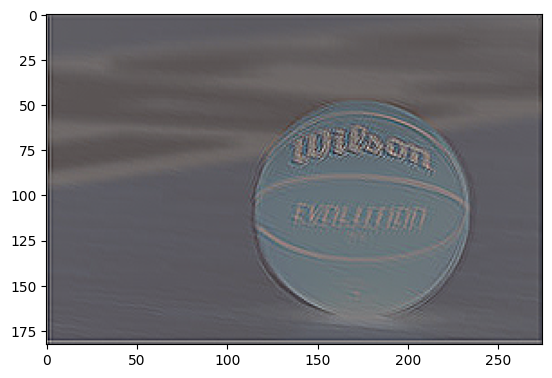

In [23]:
plt.imshow(image_shape.permute(1,2,0))